# Изучение закономерностей, определяющих успешность игр 

## 1 Описание проекта 

     Исходные данные: в моем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы(например Xbox или Playstation)
     Цель исследования - выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные компании 

## 2 Описание данных


   * Name — название игры
   * Platform - платформа
   * Year_of_Release — год выпуска
   * Genre — жанр игры
   * NA_sales — продажи в Северной Америке (миллионы проданных копий)
   * EU_sales — продажи в Европе (миллионы проданных копий)
   * JP_sales — продажи в Японии (миллионы проданных копий)
   * Other_sales — продажи в других странах (миллионы проданных копий)
   * Critic_Score — оценка критиков (максимум 100)
   * User_Score — оценка пользователей (максимум 10)
   * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


 Ход исследования содержит следующие этапы:

1) Открытие файла с данными и изучение общей информации
2) Подготовка данных 
3) Исследовательский анализ данных 
4) Составление портрета пользователя каждого региона 
5) Проверка гипотез 
6) Общий вывод 

##  3 Шаг 1. Открытие файла с данными и изучение общей информации


 Загрузим библиотеки, которые будут необходимы для работы  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st

In [2]:
# Применим конструкцию try-except. 


server_path = '/datasets/games.csv'                 # сохраняем путь к файлу на сервере Практикума

local_path  = 'C:\\Users\\user\\Pictures\\games.csv'     # сохраняем путь к файлу на компьютере 

try:  
    df = pd.read_csv(server_path, sep=',')          # пробуем найти данные по сетевому адресу  
except: 
    df = pd.read_csv(local_path, sep=',')           # если не находим по сетевому, ищем по локальному 

In [3]:
# Выведем и изучим первые пять строк датафрейма df
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выведем и изучим последние пять строк датафрейма df 
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Выведем случайные 10 строк датафрейма с помощью метода sample() 
df.sample(random_state=1, n = 10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


In [6]:
# Посчитаем количество строк в  таблице df
len(df)

16715

In [7]:
# Изучим общую информацию о датафрейме 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


     Общий объем хранимых данных в датафрейме df_games составил 1.4 мегабайт. Как видно всего в таблице 6 столбцов с вещественным типом данных float64 (Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score) и 5 столбцов с типом данных object(Name, Platform, Genre, User_Score, Rating). 
    

In [8]:
# Проверим датафрейм df на наличие явных дубликатов с помощью метода duplicated()
df.duplicated().sum()

0

In [9]:
# приведем названия столбцов к нижнему регистру 
df = df.rename(columns ={'Name': 'name', 'Platform':'platform','Year_of_Release': 'year_of_release'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
# Посмотрим на количество дубликатов
duplicateRows = df[df.duplicated(['name', 'platform','year_of_release'])]

duplicateRows

,name,platform,year_of_release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


    Есть две строки, в которых значения столбцов 'name','platform','year_of_release' являются точными копиями предыдущих строк.

In [11]:
# Удалим дубликаты
df= df.drop_duplicates(subset=['name', 'platform','year_of_release'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
# Найдем количество пропущенных значений в датафрейме df
df.isna().sum() 

name                  1
platform              0
year_of_release     269
Genre                 1
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8577
User_Score         6700
Rating             6765
dtype: int64

      Видим, что в столбцах name, year_of_release, critic_score, user_score, rating есть пропущенные значения. В следующем шаге исследования мы займемся подготовкой данных и решим, что делать с пустыми значениями. 

      Вывод по изучению общей информации: 
     
      По итогам первичного знакомства с данными я обнаружил , что всего в датасете 16715 записей. Общий объем данных в датафрейме df_games составил 1.4 MB. Его можно оптимизировать, изменив тип данных для некоторых столбцов. Также я обнаружил, что в столбцах name, year_of_release, critic_score, user_score, rating есть прпоущенные значения. Их предобработкой займемся во втором шаге исследования. 
    

## 4  Шаг 2. Подготовка данных 

## 5 2.1 Заменим названия столбцов(приведем к нижнему регистру)

In [13]:
# Посмтотрим названия столбцов в нашей таблице
df.columns 

Index(['name', 'platform', 'year_of_release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [14]:
# Заменим названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

    Видим, что названия столбцов теперь начинаются со строчной буквы и приведены к нижнему регистру

## 6  2.2 Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [15]:
# Изучим ещё раз общую инфомрацию о датасете.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
# В столбце year_of_release указан вещественный тип данных. Это некорректно. Поменяем тип данных на целочисленный Int64.
df['year_of_release'] = df['year_of_release'].astype('Int64') 

In [17]:
# В столбце user_score указан тип данных object. Поменяем тип данных на вещественный float64.
df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce') 

In [18]:
# Проверим поменялись ли типы данных для столбцов year_of_release и user_score. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


## 7 2.3 Обработаем пропуски при необходимости

In [19]:
# Посмотрим на количество пропусков в столбцах нашей таблицы
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [20]:
df['year_of_release'].isna().sum() 



269

In [21]:
df['year_of_release'].isna().sum() / len(df) * 100

1.6095255190570215

In [22]:
df  = df.dropna(subset=['year_of_release'])
len(df)

16444

In [23]:
# Определим долю пропущенных значений от общего количества строк для столбца critic_score 
df['critic_score'].isna().sum()/ len(df) * 100

51.459498905375824

In [24]:
# Определим долю пропущенных значений от общего количества строк для столбца user_score
df['user_score'].isna().sum()/ len(df) * 100

54.6217465336901


     В столбце year_of_release есть 269 пропусков. Можно заполнить пропуски медианным значением либо средним арифметическим, но это исказит данные и приведет к неверным результатам. Также доля пропущенных значений от общего числа составляет 1.6 % и ею целесообразно пренебречь. Значит, можем удалить данные.
     В столбце critic_score 8578 пропущенных значений или 51 % от общего количества строк. В этом случае удалять данные представляется невозможным.  Можно заменить пропуски медианным значением по выборке, но в таком случае это приведёт к неверным результатам. Поэтому не будем заполнять пропуски. 
     В столбце user_score 9125 пропущенных значений или 55 % от общего количества строк. Удалять данные также невозможно, так как доля пропущенных значений более 10 %. Оставим пропуски незаполненными. 

     В сети Интернет я обнаружил информацию о ESRB. Это ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
   * «EC» («Early childhood») — «Для детей младшего возраста»:
   * «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. 
   * «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 
   * «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
   * «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет 
   * «AO» («Adults Only 18+») — «Только для взрослых» 
   * «RP» («Rating Pending») — «Рейтинг ожидается»
   * «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+» 
       Таким образом, могу предположить, что для некоторых игр не присвоен или не определен рейтинг, поэтому возникают пропущенные значения.

In [25]:
# Заменим пропущенные значения в столбце rating на 'not defined'
df['rating'] = df['rating'].fillna('not defined')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


    В столбце с оценкой пользователей user_score есть аббревиатура TBD. Я обнаружил, что TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 

In [26]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


    Среди основных причин, которые могли привести к возникновению пропусков, можно отнести: ошибки ввода данных, человеческий фактор, сокрытие информации. 

## 8 2.4  Посчитаем  суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [27]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not defined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,not defined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,not defined,28.31


In [28]:
# проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [29]:
# Посмтотрим сколько пропусков в столбце genre
df['genre'].isna().sum()


1

In [30]:
# Посмтотрим сколько пропусков в столбце name 
df['name'].isna().sum() 

1

In [31]:
# Удалим пропущенные значения в столбцах genre и name
df  = df.dropna(subset=['genre', 'name'])
len(df) 

16443

        Вывод по подготовке данных: 
 
     По итогам предобработки данных были заменены  названия столбцов (приведены к нижнему регистру), для столбца  year_of_release поменяли тип данных на целочисленный Int64, для столбца user_score тип данных поменяли на вещественный float64. Определили в каких столбцах есть пропуски. Для столбца year_of_release было принято решение удалить пропуски, так как доля пропущенных значений составила менее 10 % от общей длины датафрейма. Для столбца rating пропуски заменили на 'not defined'. В таблицу df был добавлен новый столбец total_sales, в котором отображаются суммарные продажи во всех регионах. Перейдем к 3 шагу исследования.
    

## 9 Шаг 3. Исследовательский анализ данных

### 10 3.1 Посмотрим, сколько игр выпускалось в разные годы. Ответим на вопрос важны ли данные за все периоды?


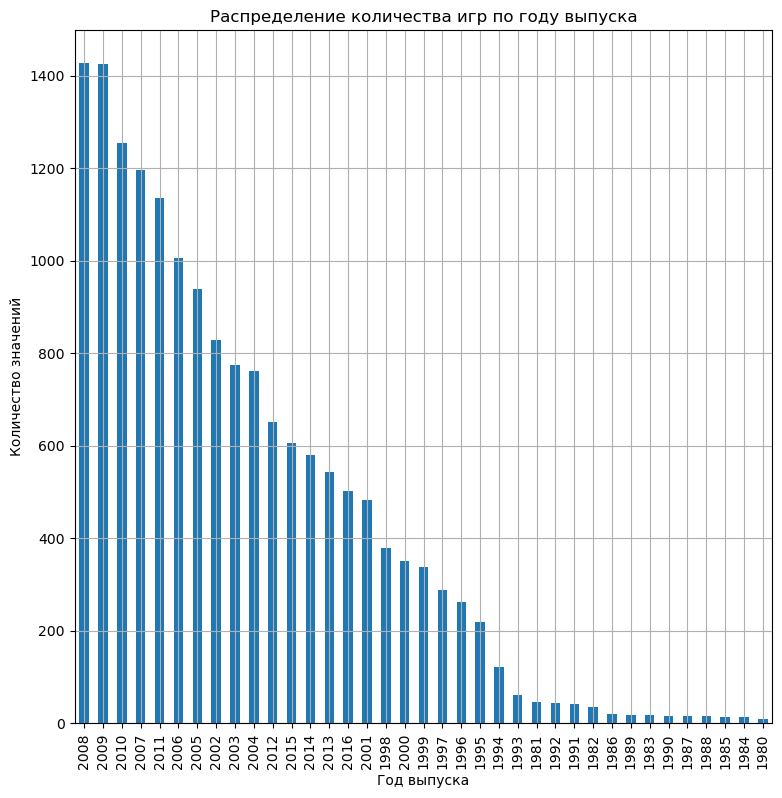

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [32]:
plt.figure(figsize= (9,9))
df.groupby('year_of_release')['name'].agg('count').sort_values(ascending = False).plot(kind='bar', grid=True)
plt.title('Распределение количества игр по году выпуска')
plt.ylabel('Количество значений')
plt.xlabel('Год выпуска')
plt.xticks(rotation = 'vertical')
plt.show()
# C помощью метода value_counts() посчитаем количество уникальных значений в столбце year_of_release.
df['year_of_release'].value_counts()

       Как видно из графика, 9 игр было выпущено в 1980 году. Это минимальное значение по всей выборке. Это можно было ожидать, так как в нашем распоряжении данные от 1980 до 2016 года.Больше всего игр было выпущено в 2008 году(1427). После 2008 года количество выпущенных игр стало заметно снижаться. Можно заметить, что в 2016 году игр было выпущено почти  столько же , сколько и в 2001 году-15 лет назад. Данные за все периоды важны, так как они помогают посмотреть динамику роста или падения количества игр за все годы.

### 11  3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы ?"

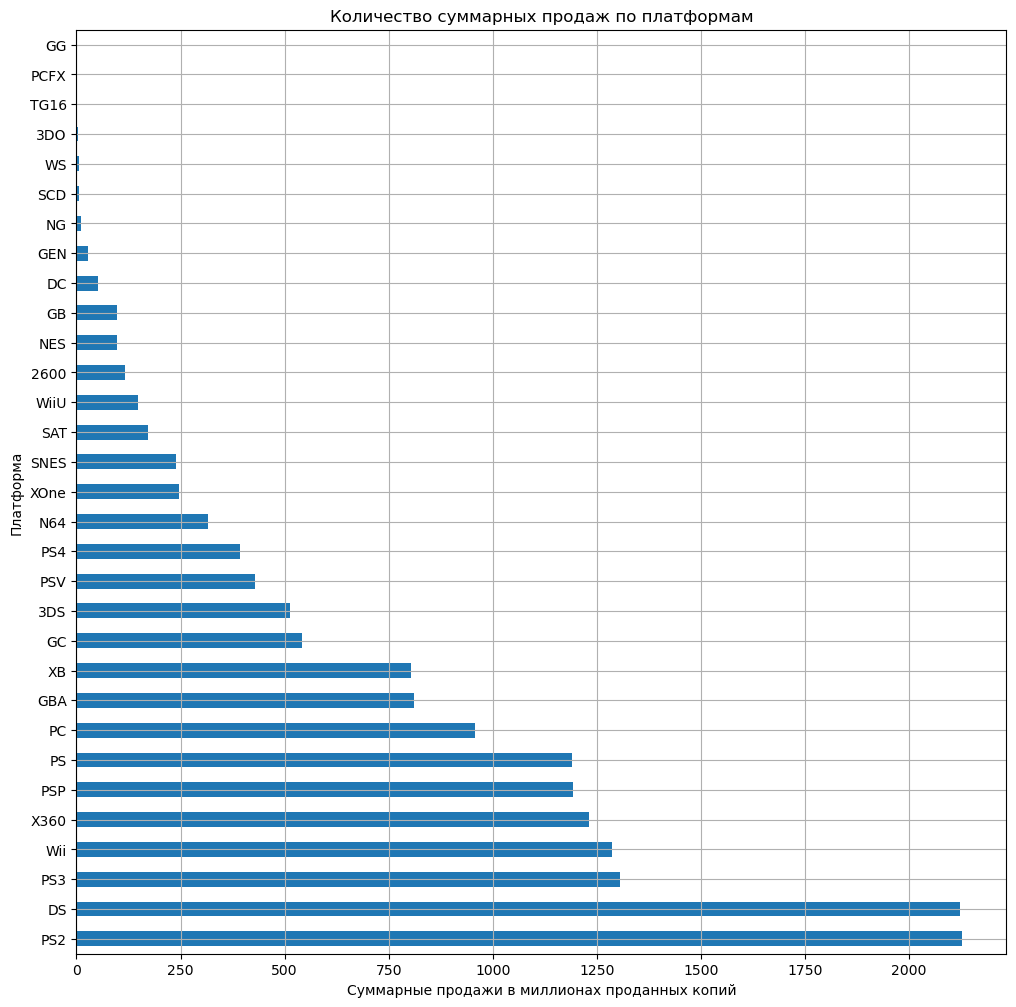

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [33]:
plt.figure(figsize=(12,12))
df.groupby('platform')['total_sales'].agg('count').sort_values(ascending=False).plot(kind='barh',grid=True)
plt.title('Количество суммарных продаж по платформам')
plt.xlabel('Суммарные продажи в миллионах проданных копий')
plt.ylabel('Платформа') 
plt.show()

# C помощью метода value_counts() посчитаем количество уникальных значений в столбце platform.
df['platform'].value_counts()

    По данным графика можно заметить что, есть две лидирующие платформы по суммарным продажам. Это PS2 c 2127 млн проданных копий и DS c 2121 млн проданных копий. Меньше всего суммарных продаж у двух платформ-GG и PCFX(по 1 млн проданной копий у каждой).

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выберем первые 6 самых популярных платформ.

In [34]:
total_sales_for_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales',ascending=False)
top_6_platforms = total_sales_for_platform.head(6)
top_6_platforms

,total_sales
platform,
PS2,2127
DS,2121
PS3,1305
Wii,1286
X360,1232
PSP,1193


In [35]:
# Напишем функцию 
def total_sales_for_platform(name, df):
    return (df.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    .sort_values('year_of_release', ascending=False))



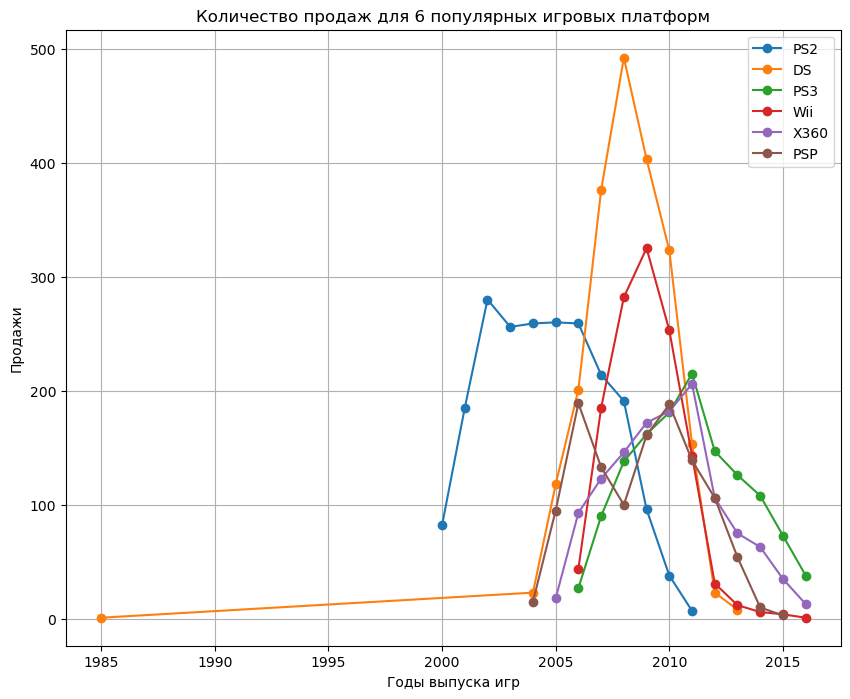

In [36]:
# Построим распределение по годам для 6 самых популярных платформ
for x in list(top_6_platforms.index):
    total_sales_for_platform(x, df)['total_sales'].plot(style='o-',figsize=(10,8), label= x, grid = True)
    plt.title('Количество продаж для 6 популярных игровых платформ')
    plt.xlabel('Годы выпуска игр')
    plt.ylabel('Продажи')
    plt.legend()

   Как видим из графика, самое большое количество проданных игр было у платформы DS. 
   Пик популярности пришелся на 2008 год. 
   В целом видим, что  платформы появляются и исчезают за 10 лет. В течение 10 лет платформы проходят все стадии жизненного цикла(разработка продукта, внедрение на рынок, рост продаж, зрелость продукта, спад продаж, уход с рынка) 


     Можно заметить странную аномалию у платформы DS. На графике указано, что платформа выпущена в 1985 году, хотя на самом деле консоль DS была выпущена в 2004 году в Канаде, США, Японии. Удалим аномалию.

In [37]:
# Посмтотрим какой процент данных потеряем, если удалить аномальные значения

len(df[(df['year_of_release'] <= 1985)   & (df['platform'] == "DS")]) / len(df) * 100 
 



 




0.006081615277017576

In [38]:
# Введем переменную year_of_release_DS_outliers и сохраним в ней аномальные значения 

year_of_release_DS_outliers = df[(df['year_of_release'] <= 1985)   & (df['platform'] == "DS")].index
df = df.drop(index=year_of_release_DS_outliers) 

In [39]:
len(df) 

16442

In [40]:
# В результате исследования предыдущих вопросов определили актуальный период от 2014  до 2016 года.
actual_years = (df['year_of_release'] > 2013) &  (df['year_of_release'] <= 2016) 
actual_games = df.loc[actual_years] 

In [41]:
# проверка 
actual_games.year_of_release.unique() 

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

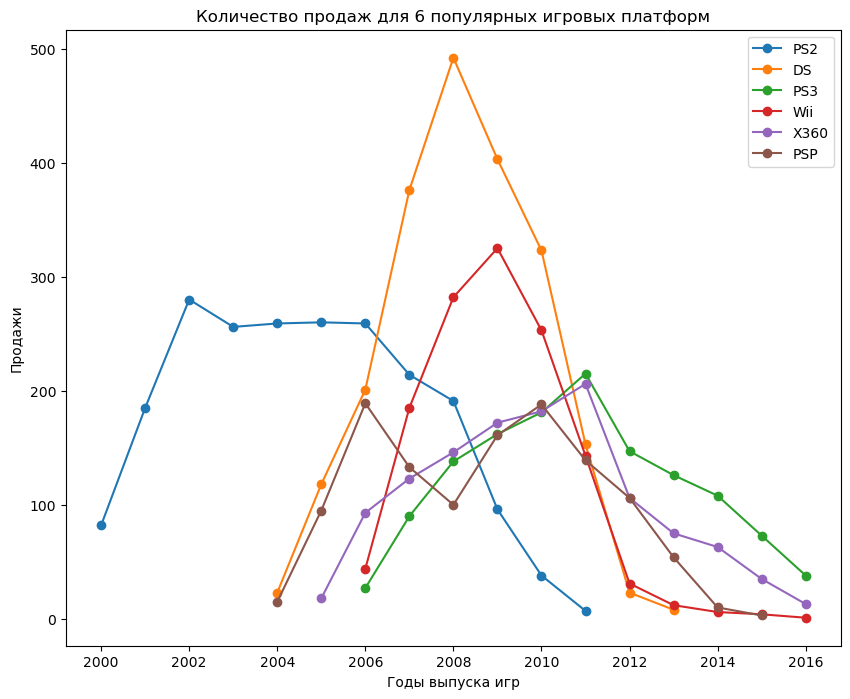

In [42]:
# Построим распределение по годам для 6 самых популярных платформ
for x in list(top_6_platforms.index):
    total_sales_for_platform(x, df)['total_sales'].plot(style='o-',figsize=(10,8), label= x)
    plt.title('Количество продаж для 6 популярных игровых платформ')
    plt.xlabel('Годы выпуска игр')
    plt.ylabel('Продажи')
    plt.legend() 

### 12 3.3 Ответим на вопрос: 'Какие платформы лидируют по продажам, растут или падают?' Выберем несколько потенциально прибыльных платформ.

Axes(0.125,0.11;0.775x0.77)


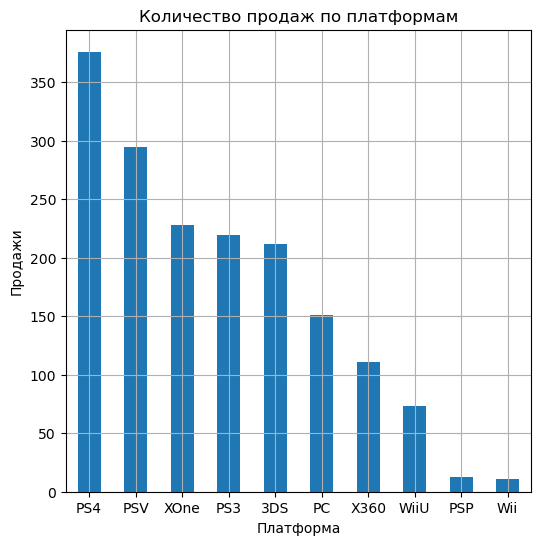

In [43]:
plt.figure(figsize=(6,6))
total_sales_for_actual = actual_games.groupby('platform')['total_sales'].agg('count').sort_values(ascending=False).plot(kind='bar',grid=True)
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
print(total_sales_for_actual)
plt.show() 

    На графике видим количество продаж для каждой платформы за выбранный актуальный период

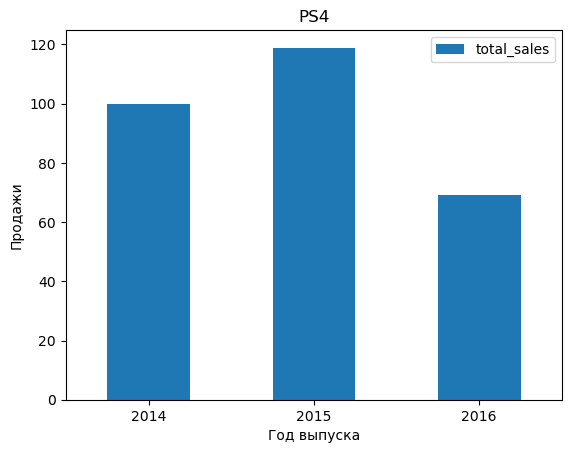

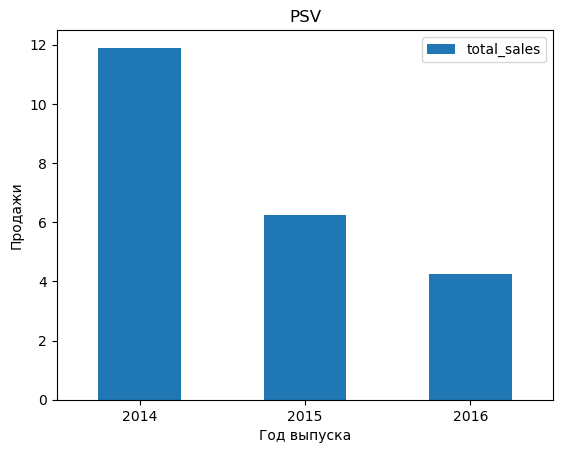

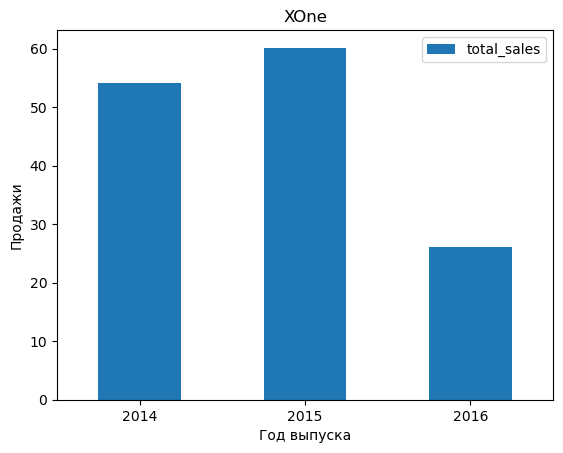

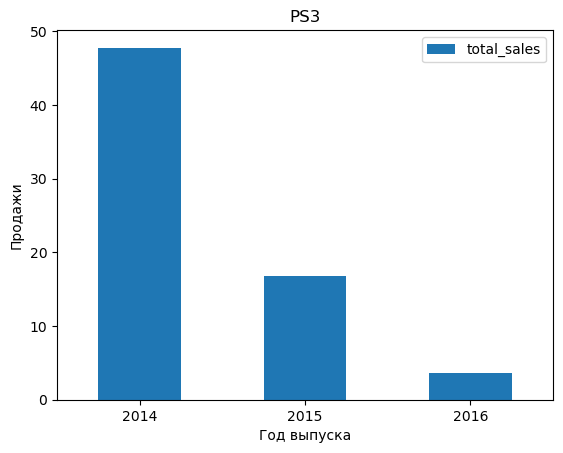

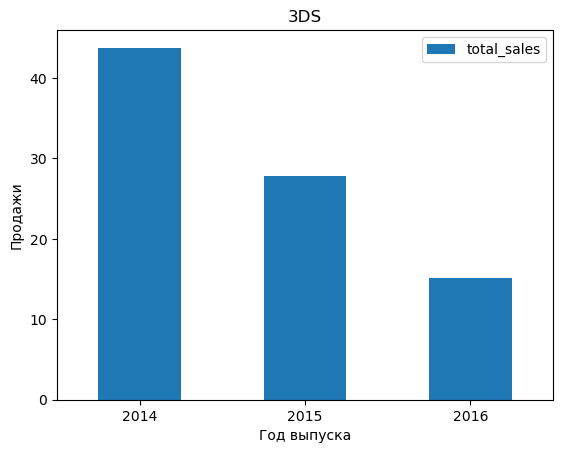

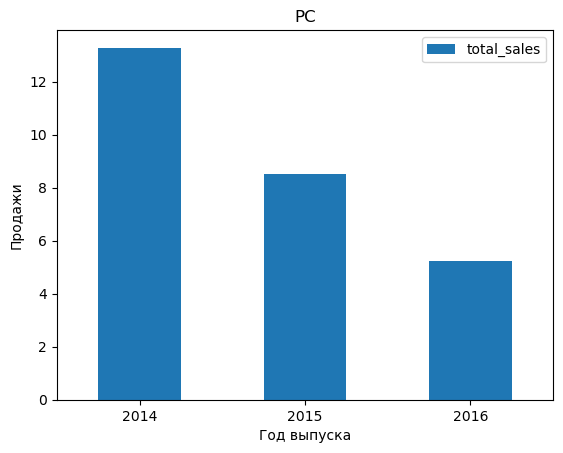

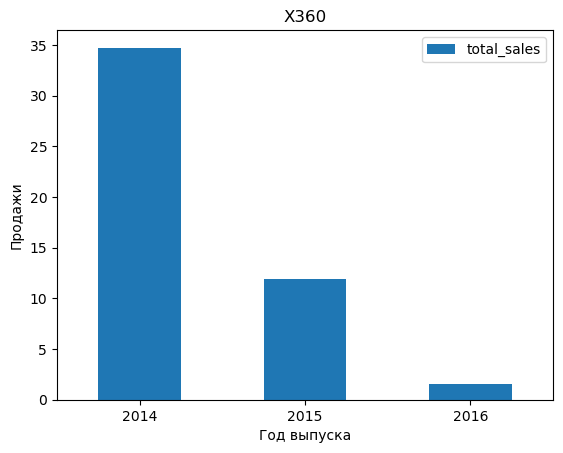

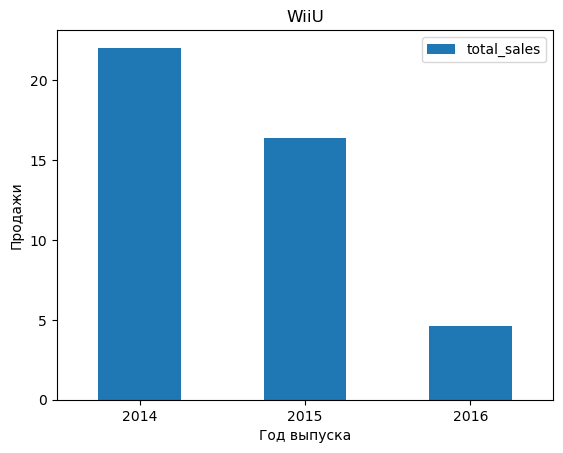

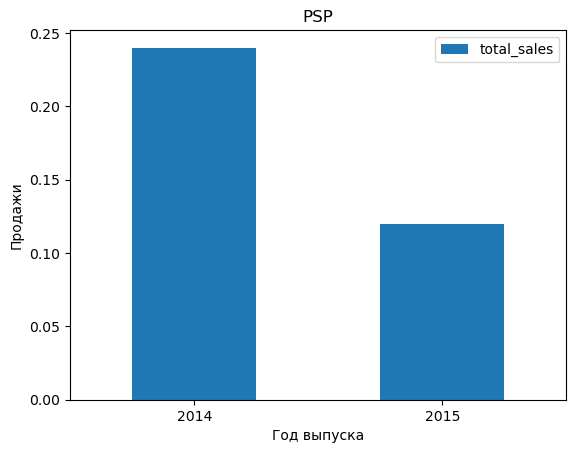

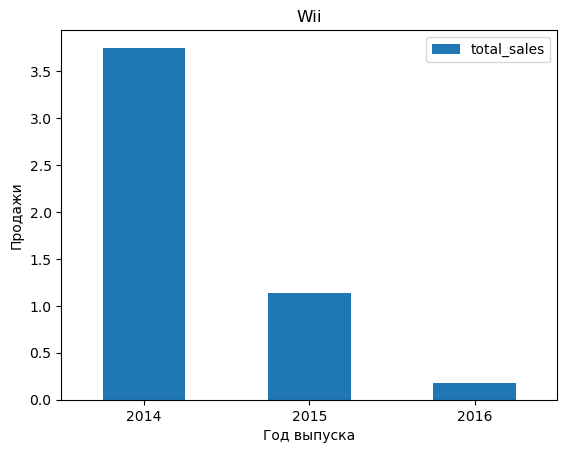

In [44]:
actual_games.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('PS4')
plt.show()

actual_games.query('platform == "PSV"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('PSV')
plt.show()

actual_games.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('XOne')
plt.show()

actual_games.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('PS3')
plt.show()

actual_games.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('3DS')
plt.show()

actual_games.query('platform == "PC"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('PC')
plt.show()

actual_games.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('X360')
plt.show()

actual_games.query('platform == "WiiU"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('WiiU')
plt.show()

actual_games.query('platform == "PSP"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('PSP')
plt.show()

actual_games.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.xticks(rotation = 'horizontal')
plt.title('Wii')
plt.show()





     Вывод: 
     На нескольких платформах модем увидеть падение продаж. Графики падения можно наблюдать у платформ PSV, PS3, X360,  PSP,Wii,WiiU,
     От остальных платформ можно ожидать роста популярности.
     
     Среди потенциально прибыльных платформ можно выделить:
   * PS4
   * XOne
   * 3DS
   * PC

### 13 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [45]:
# Построим новую таблицу по потенциально прибыльным платформам
new_df = actual_games.query('platform in ["PS4","XOne","3DS", "PC"]')
# Выведем случайным образом 10 строк датафрейма new_df 
new_df.sample(random_state = 1, n = 10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4279,FIFA 15,3DS,2014,Sports,0.09,0.34,0.00,0.03,NaN,2.4,E,0.46
15524,Devil Survivor: Over Clock,3DS,2015,Strategy,0.00,0.00,0.02,0.00,NaN,NaN,not defined,0.02
12399,One Piece: Burning Blood,XOne,2016,Fighting,0.03,0.02,0.00,0.01,60.0,5.8,T,0.06
9922,Samurai Warriors 4-II,PS4,2015,Action,0.03,0.02,0.06,0.01,73.0,7.3,T,0.12
6629,The Legend of Legacy,3DS,2015,Role-Playing,0.12,0.01,0.10,0.02,67.0,7.1,E10+,0.25
4686,LEGO Dimensions,XOne,2015,Action,0.22,0.15,0.00,0.04,80.0,6.9,E10+,0.41
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,not defined,0.01
4887,Dark Souls III,XOne,2016,Role-Playing,0.26,0.09,0.00,0.04,87.0,8.6,not defined,0.39
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
976,The Evil Within,PS4,2014,Action,0.55,0.86,0.11,0.27,75.0,7.3,M,1.79


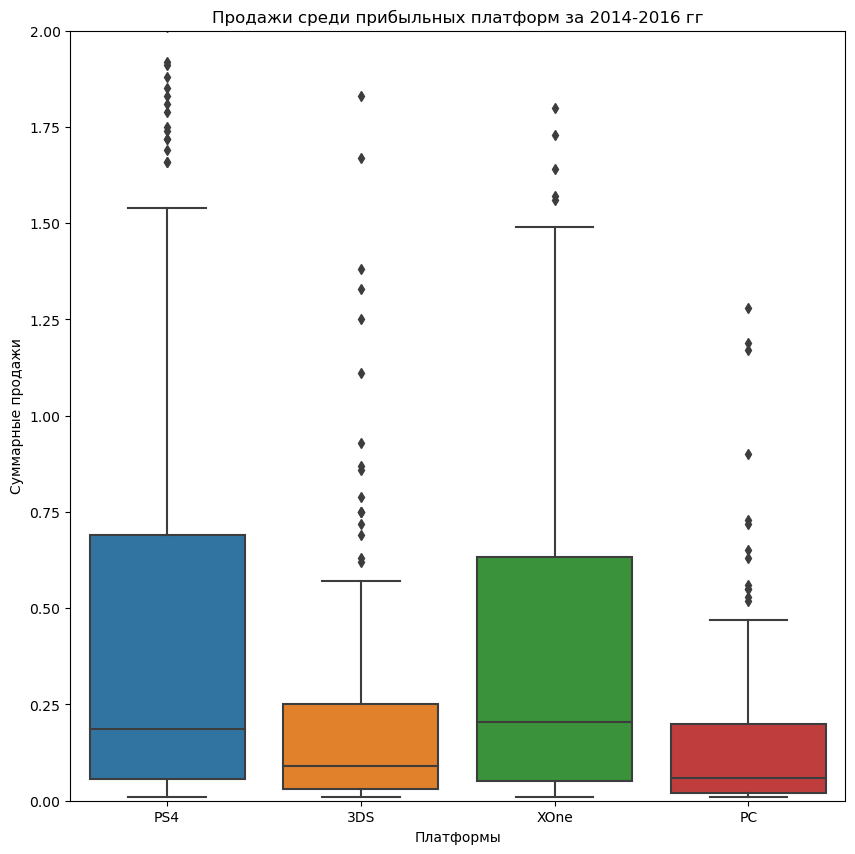

count    967.000000
mean       0.560745
std        1.280676
min        0.010000
25%        0.040000
50%        0.130000
75%        0.455000
max       14.630000
Name: total_sales, dtype: float64

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df, x='platform', y='total_sales').set(xlabel='Платформы', ylabel='Суммарные продажи',ylim=(0,2),title = 'Продажи среди прибыльных платформ за 2014-2016 гг')
plt.show()

new_df['total_sales'].describe()

       Как видно из диаграммы, медиана продаж  для XOne и PS4 примерно находится на 1 уровне и  равна 0.2 млн проданных копий. Нижний "ус" для  всех четырех платформ расположен возле ноля. Верхний "ус" для PS4  находится около уровня в 1.5  млн проданных копий. Все, что лежит выше верхнего "уса" для исследуемых платформ  можно считать выбросами. Медиана продаж для выбранных перспективных платформ равна 0.13 млн копий. Среднее значение равно 0.56 млн проданных копий.

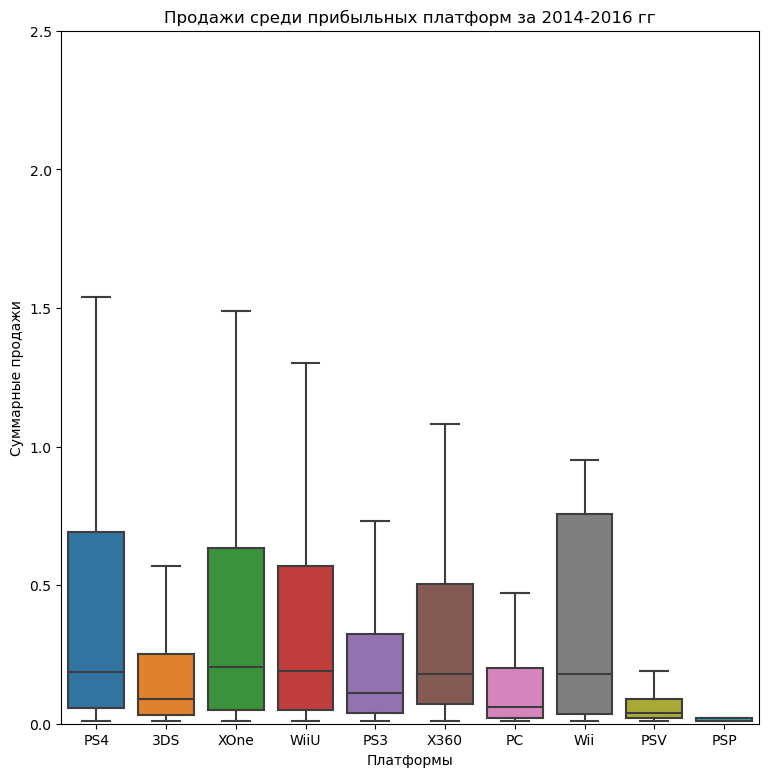

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [47]:
# Построим график "ящик с усами" без выбросов.
plt.figure(figsize=(9,9))
sns.boxplot(data=actual_games, x='platform', y='total_sales', showfliers = False).set(xlabel='Платформы', ylabel='Суммарные продажи', ylim=(0,2.5),title = 'Продажи среди прибыльных платформ за 2014-2016 гг')
plt.show()

actual_games['total_sales'].describe()

    Как видно из диаграммы размаха, уровень продаж среди платформ приблизительно одинаковый везде, медиана продаж составила 0.1 млн проданных копий, среднее значение продаж среди платформ равно 0.43 млн проданных копий. В среднем межквартильный размах равен 0.32  млн проданных копий.

##   14 3.5  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. 

In [48]:
#  Посмотрим как влияют на продажи внутри одной платформы XOne отзывы пользователей и критиков.
XOne_sales_critic_and_user_scores = actual_games.query('platform =="XOne"').loc[:,['total_sales','critic_score','user_score']] 

XOne_sales_critic_and_user_scores.head()

,total_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [49]:
# Посчитаем коэффициент корреляции Пирсона между столбцами total_sales, critic_score и user_score  
XOne_sales_critic_and_user_scores.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


Согласно шкале Чеддока видим, что наблюдается умеренная положительная связь между суммарными продажами и оценкой критиков. Она равна 0.43 или 43 %. Также видно, что есть положительная умеренная связь между оценкой критиков и оценкой пользователей. Она составляет 0.44 или 44 %.

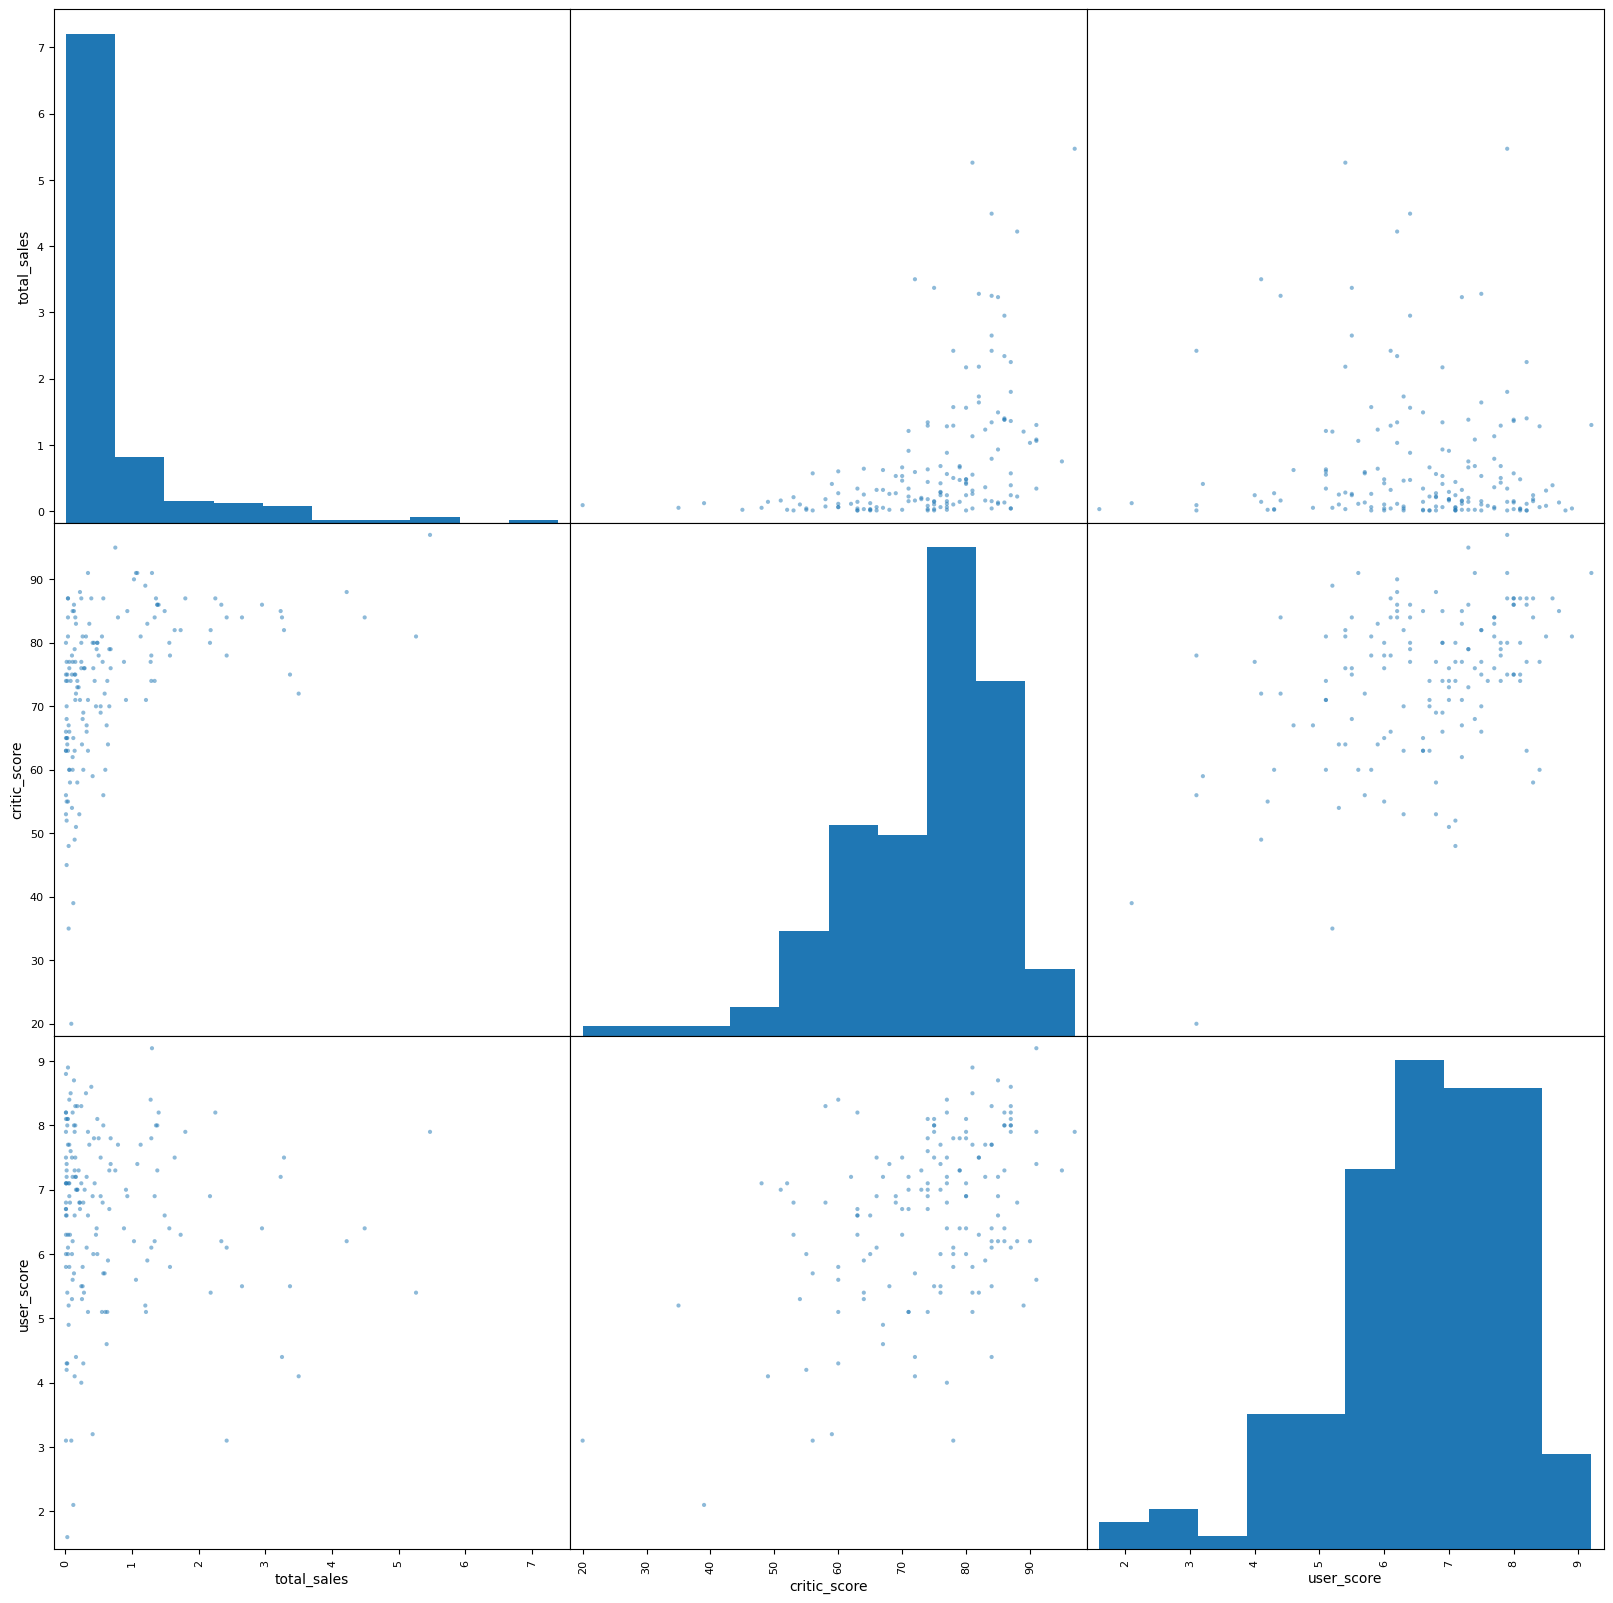

In [50]:
# Построим матрицу диаграмм рассеяния и посчитаем  корреляцию между отзывами и продажами 
pd.plotting.scatter_matrix(XOne_sales_critic_and_user_scores, figsize=(20,20));

## 15 3.6 Соотнесем выводы с продажами игр на других платформах. 

In [51]:
# Посмотрим как влияют на продажи внутри одной платформы PS4 отзывы пользователей и критиков.
PS4_sales_critic_and_user_scores = actual_games.query('platform =="PS4"').loc[:,['total_sales','critic_score','user_score']] 

PS4_sales_critic_and_user_scores.head()

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [52]:
# Посчитаем коэффициент корреляции Пирсона между столбцами total_sales, critic_score и user_score  
PS4_sales_critic_and_user_scores.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


  По шкале Чеддока можно увидеть умеренную положительную связь между продажами и оценкой критиков. Она равна 0.40 или 40 %. Можно сказать, что продажи и оценки пользователей между собой никак не связаны. Также мы видим что есть заметная положительная связь между оценкой пользователей и оценкой критиков. Она равна 0.55 или 55 %.

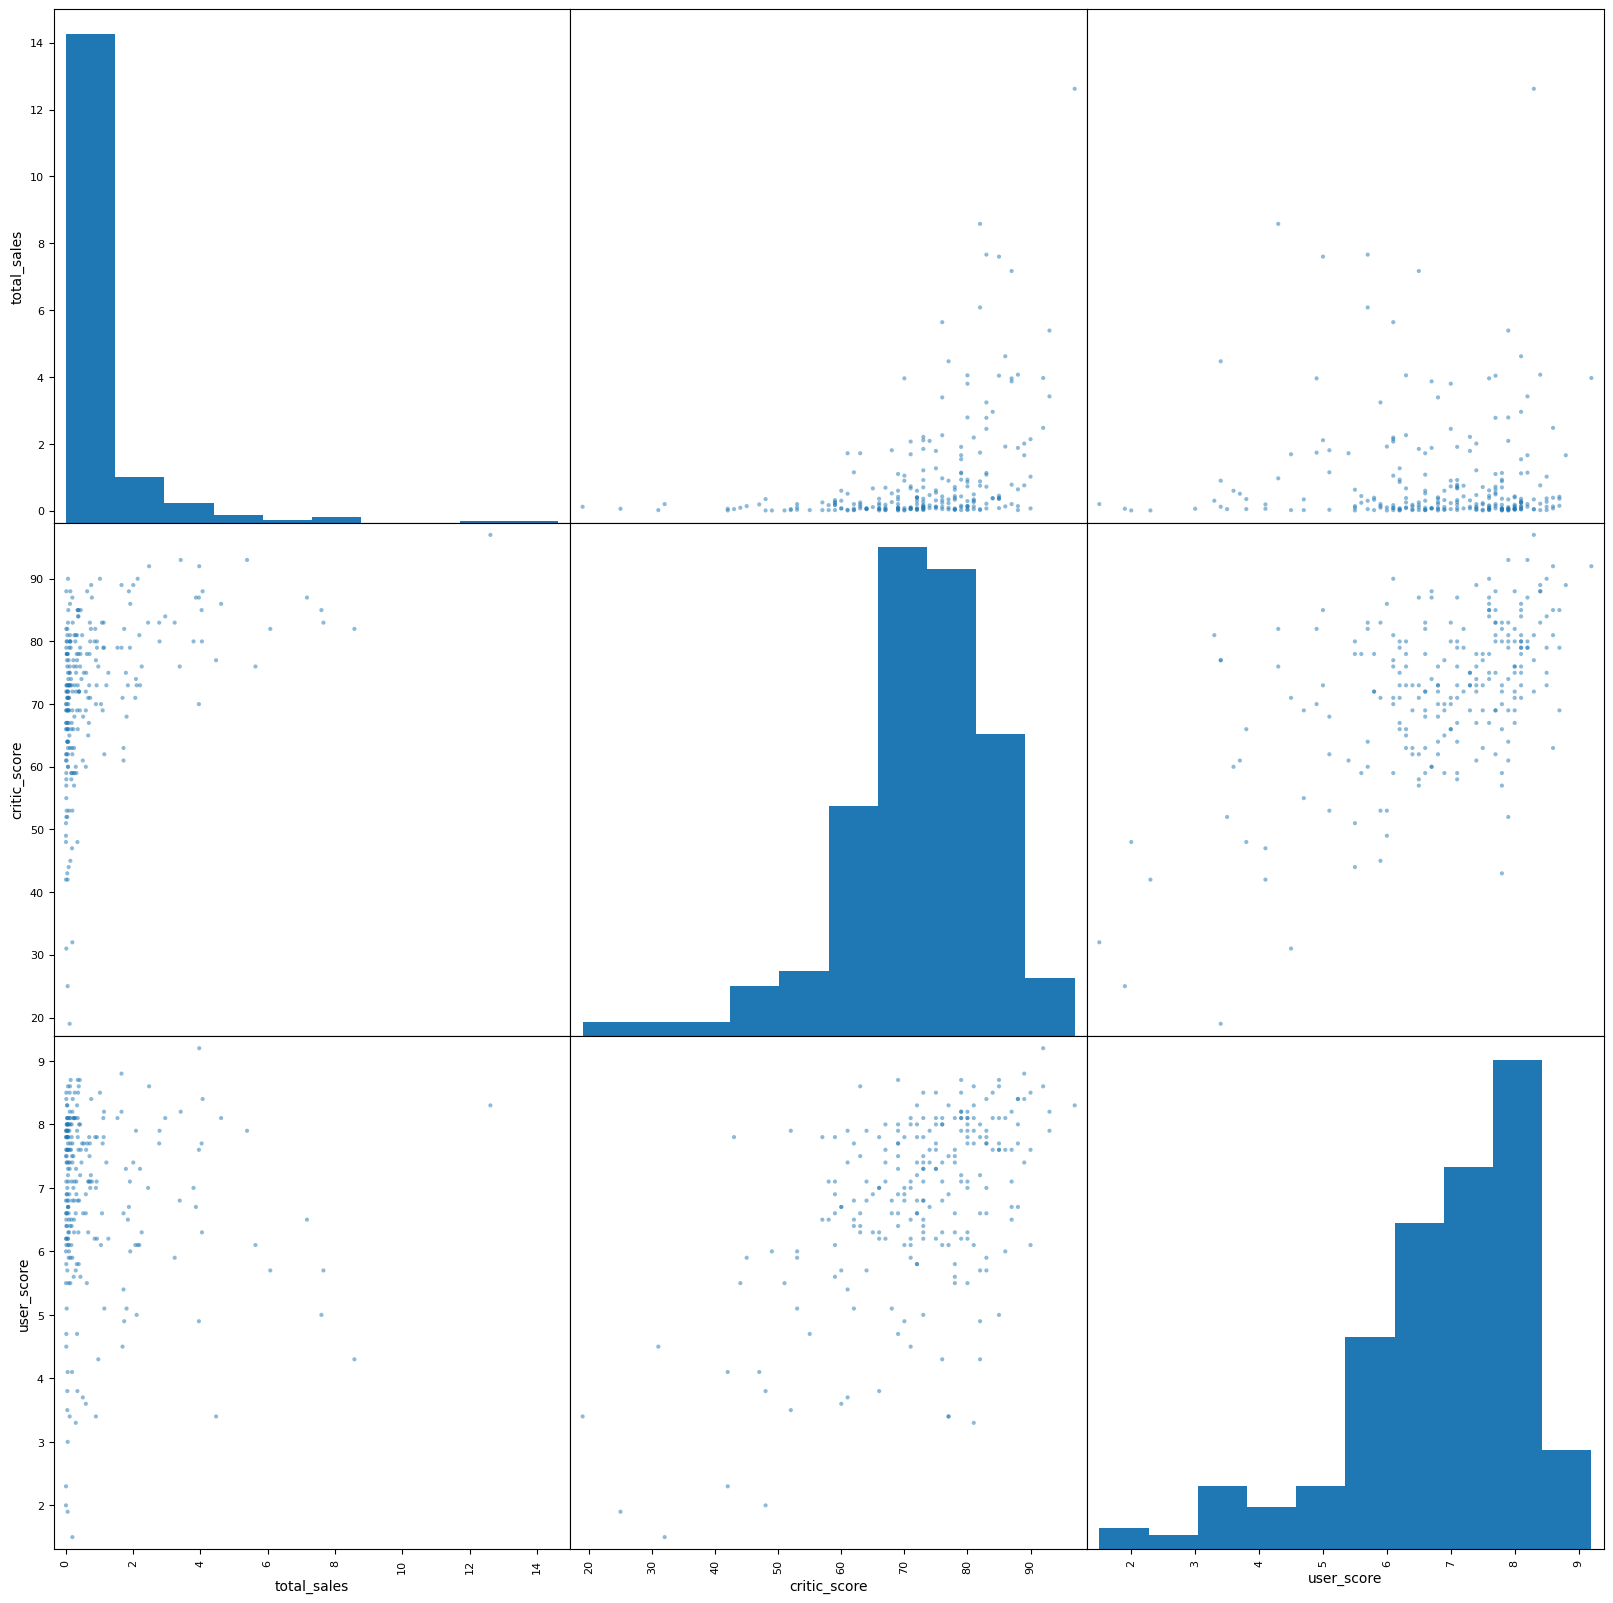

In [53]:
# Построим  матрицу  диаграмм рассеяния и посчитаем  корреляцию между отзывами и продажами 
pd.plotting.scatter_matrix(PS4_sales_critic_and_user_scores, figsize=(20,20));


In [54]:
# Посмотрим как влияют на продажи внутри одной платформы 3DS  отзывы пользователей и критиков.
ThreeDS_sales_critic_and_user_scores = actual_games.query('platform =="3DS"').loc[:,['total_sales','critic_score','user_score']] 

ThreeDS_sales_critic_and_user_scores.head()

,total_sales,critic_score,user_score
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
312,3.89,86.0,8.7
406,3.32,NaN,NaN


In [55]:
# Посчитаем коэффициент корреляции Пирсона между столбцами total_sales, critic_score и user_score  
ThreeDS_sales_critic_and_user_scores.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


   По шкале Чеддока можно увидеть слабую положительную связь между продажами и оценкой критиков. Она равна 0.31 или 31 %.  Между оценкой критиков и оценкой пользователей есть высокая положительная связь. Она равна 0.86 или 86 %.

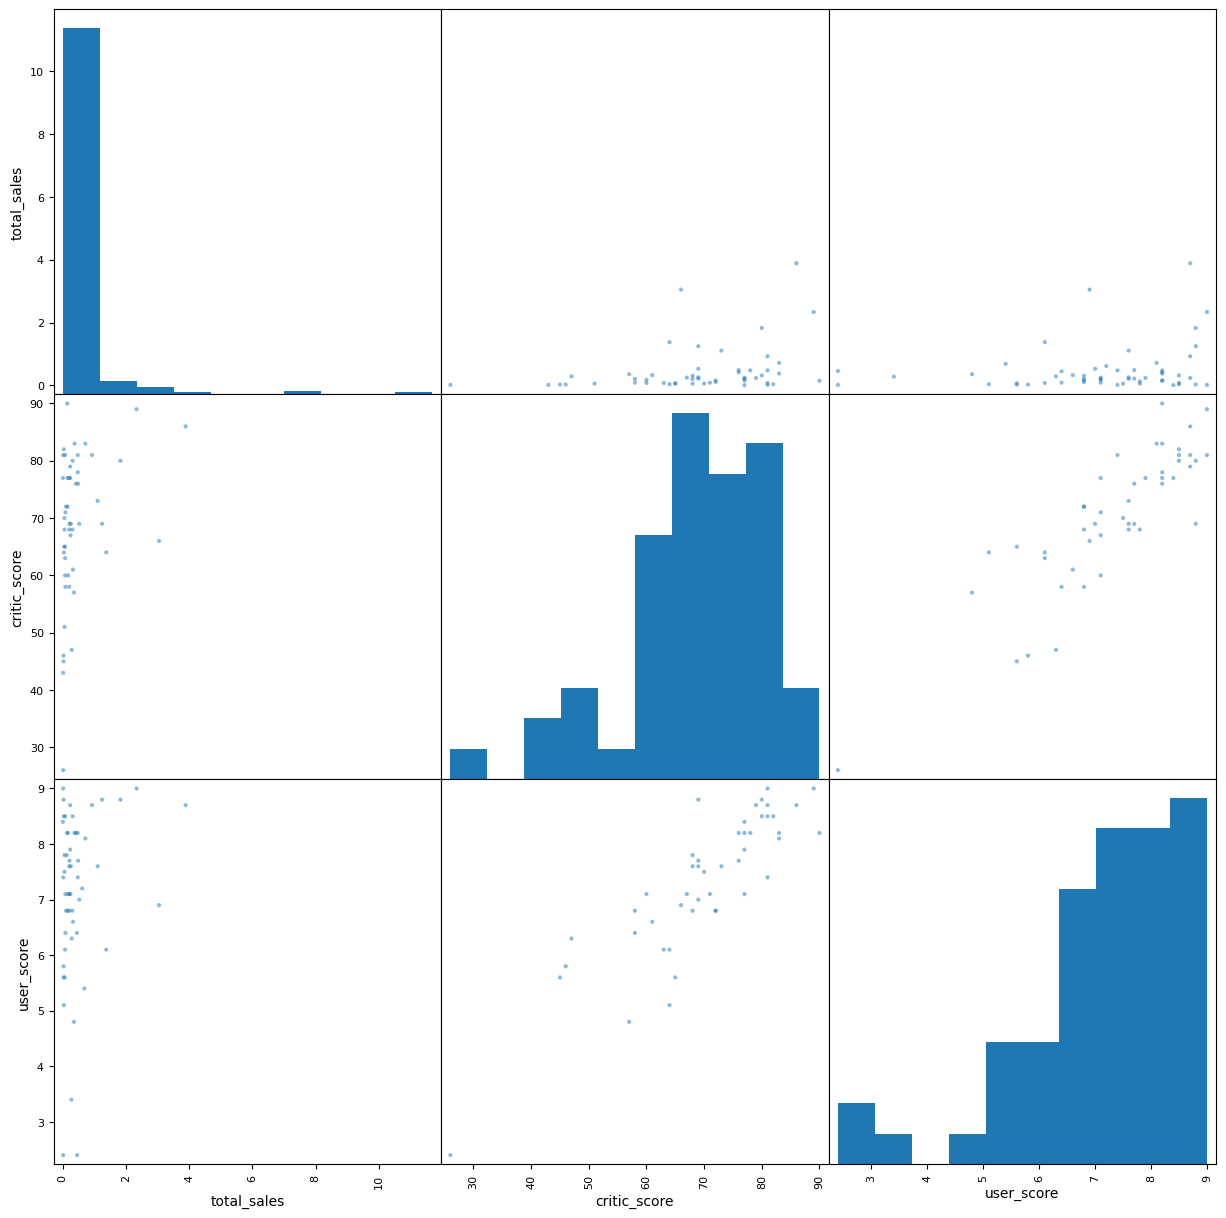

In [56]:
# Построим матрицу  диаграмм рассеяния и посчитаем  корреляцию между отзывами и продажами 
pd.plotting.scatter_matrix(ThreeDS_sales_critic_and_user_scores, figsize=(15,15));

In [57]:
# Посмотрим как влияют на продажи внутри одной платформы PC  отзывы пользователей и критиков.
PC_sales_critic_and_user_scores = actual_games.query('platform =="PC"').loc[:,['total_sales','critic_score','user_score']] 

PC_sales_critic_and_user_scores.head()

,total_sales,critic_score,user_score
458,3.05,70.0,3.9
1530,1.28,84.0,5.4
1677,1.19,NaN,NaN
1730,1.17,96.0,7.9
2303,0.90,71.0,5.7


In [58]:
# Посчитаем коэффициент корреляции Пирсона между столбцами total_sales, critic_score и user_score  
PC_sales_critic_and_user_scores.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


     По шкале Чеддока, можно заметить, что  есть  положительная слабая связь между продажами и оценкой критиков. Она равна 0.18 или 18 %. Связь между оценкой критиков и оценкой пользователей умеренная положительная и составляет 0.47 или 47 %.

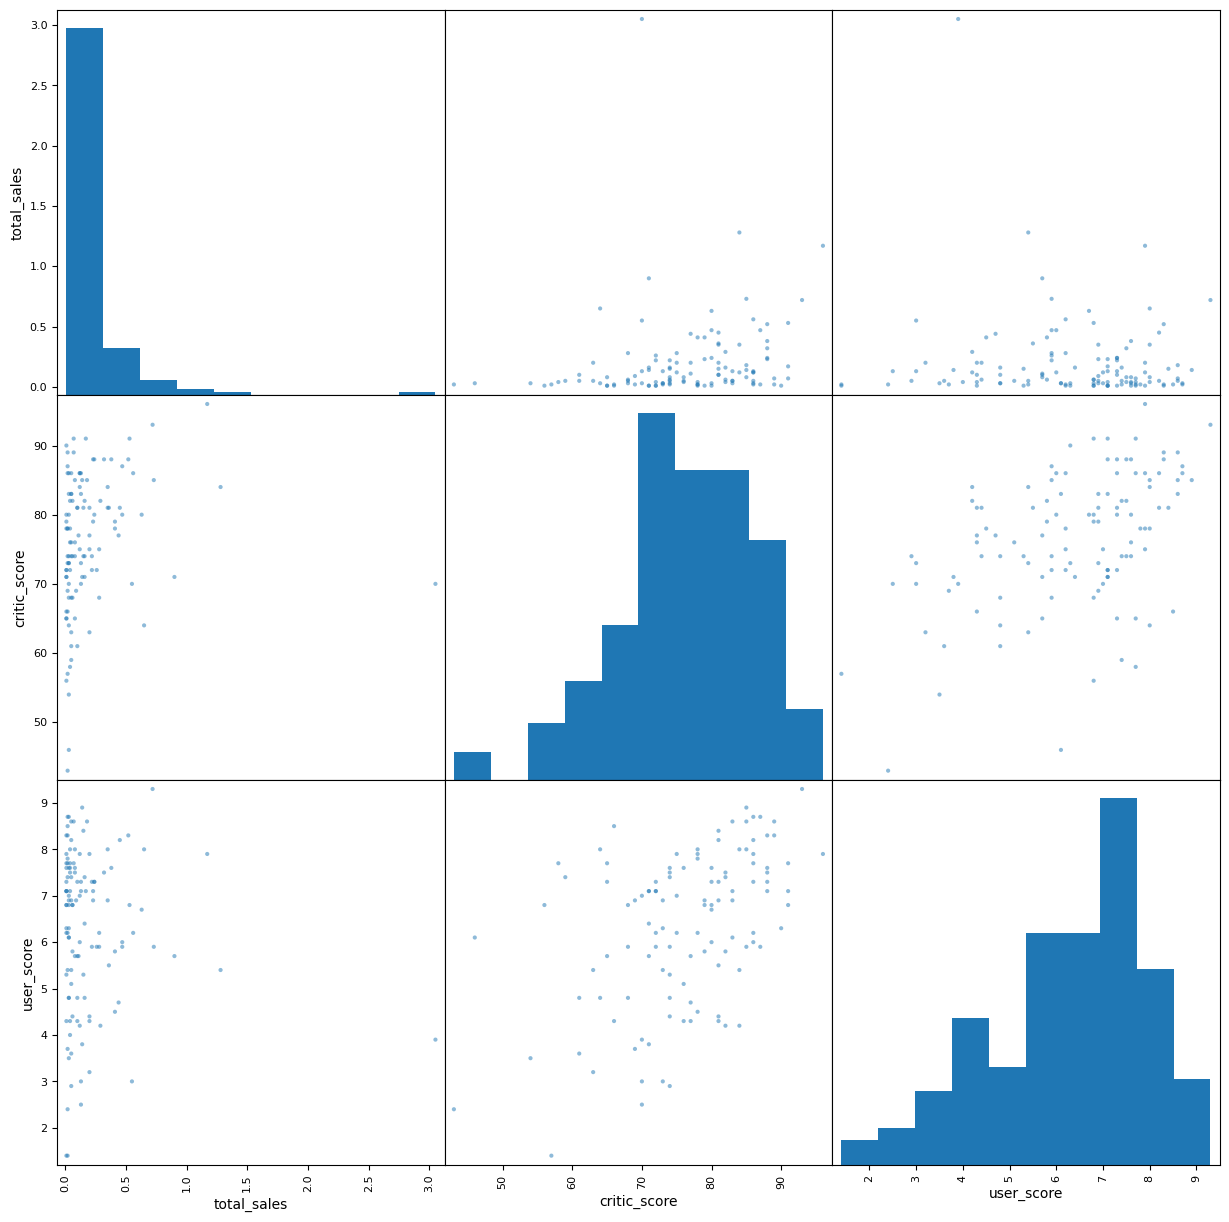

In [59]:
# Построим матрицу диаграмм рассеяния и посчитаем  корреляцию между отзывами и продажами 
pd.plotting.scatter_matrix(PC_sales_critic_and_user_scores, figsize=(15,15));

     Вывод: 
     У всех четырех платформ PS4, 3DS,XOne,PC наблюадаются примерно похожие связи между продажами и оценкой критиков и пользователей. Среди платформ выделяется 3DS, где оценки пользователей так или иначе зависят от оценки критиков. Могу предположить, что это связано с тем, что на платформе лучше всего организована работа по сбору оценок и отзывов от пользователей или пользователи более  критичны к оценке игр, чем сами критики.

##  16 3.7 Посмотрим на общее распределение игр по жанрам.  Ответим на вопросы: "Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?"

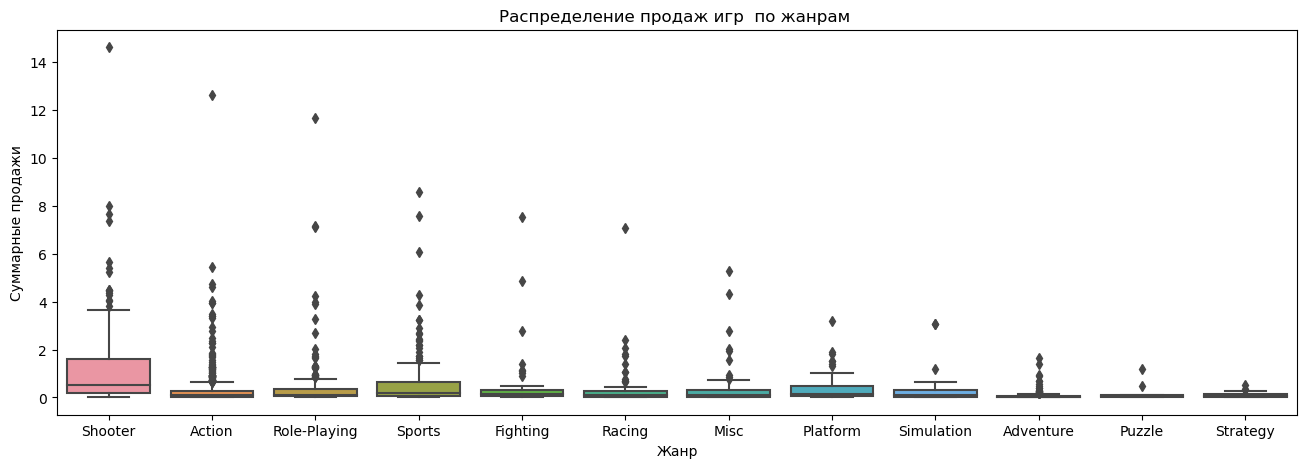

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [60]:
plt.figure(figsize=(16,5))
sns.boxplot(data=actual_games, x='genre', y='total_sales').set(xlabel='Жанр', ylabel='Суммарные продажи',title = 'Распределение продаж игр  по жанрам ')

plt.show()

actual_games['total_sales'].describe()



    На диаграмме размаха мы видим количество выбросов для каждого жанра.Выбросами можно считать игры, которые принесли максимальную выручку. По количеству выбросов лидируют такие жанры как Shooter, Sports и Action. Можно предположить, что данные жанры больше всего привлекают игроков, значит разработчики будут стремиться выпускать все больше игр подобных жанров. 

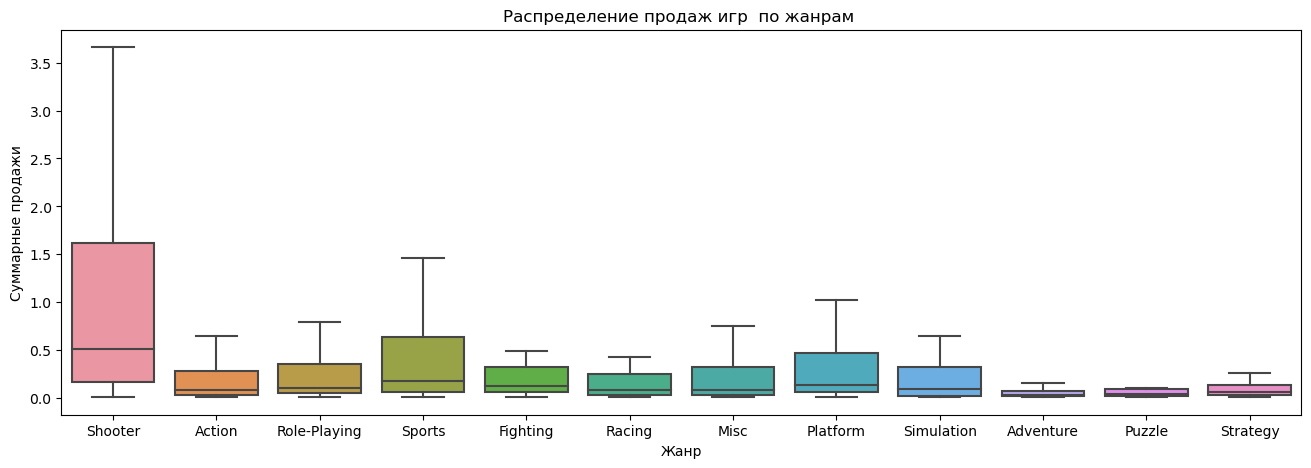

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [61]:
# Построим график "ящик с усами", которая не учитывает выбросы. 
plt.figure(figsize=(16,5))
sns.boxplot(data=actual_games, x='genre', y='total_sales',showfliers=False).set(xlabel='Жанр', ylabel='Суммарные продажи',title = 'Распределение продаж игр  по жанрам ')

plt.show()

actual_games['total_sales'].describe()

    Как видно из диаграммы размаха самыми медианы продаж по жанрам примерно равны, но среди них выделяются Shooter, Sports, Role-Playing и Action. Медиана продаж равна 0.1 млн проданных копий по выборке. Среднее значение 0.43 млн проданных копий. Таким образом, наиболее стабильными жанрами являются Shooter, Sports и Action. 

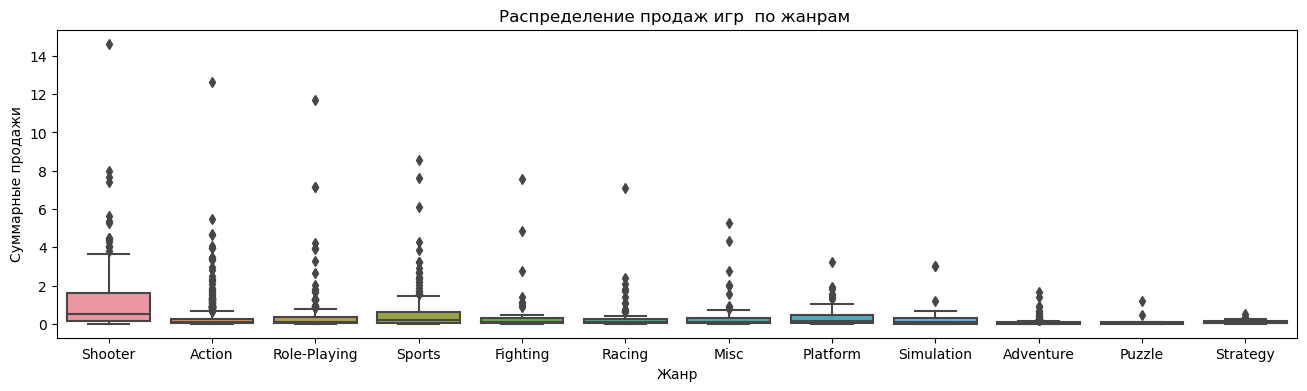

In [62]:
plt.figure(figsize=(16,4))
sns.boxplot(data=actual_games, x='genre', y='total_sales').set(xlabel='Жанр', ylabel='Суммарные продажи', 
                                                               title = 'Распределение продаж игр  по жанрам ')

plt.show() 


    Вывод по исследовательскому анализу данных:
    В результате исследовательского анализа данных были даны ответы на необходимые вопросы. Так, мы определили что в среднем жизненный цикл игровой платформы равен 10 годам. Был определен актуальный период для прогнозирования успешности игровых платформ. Были определены потенциально прибыльные игровые платформы. Это PS4, 3DS, XOne,  PC. Были построены диаграммы размаха boxplot для этих платформ. Также построили отдельно диаграммы размаха для всех остальных платформ. Для них определили среднюю медиану продаж. Для установления степени корреляции между продажами и отзывами критиков и пользователей построили матрицу диаграмм рассеяния. Было выявлено, что для платформ  XOne, PS4 и 3DS и PC примерно одинаковые связи между продажами и оценкой критиков. Определили самые прибыльные и низкодоходные жанры игр. Перейдем к 4 шагу исследования. 

##  17 Шаг 4. Составим портрет пользователя каждого региона 



### 18  4.1 Определите для пользователя каждого региона (NA, EU, JP)  самые популярные платформы (топ-5). Опишем различия в долях продаж



In [63]:
# Определим топ-5 популярных платформ в Северной Америке

actual_games.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False) 

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


In [64]:
# Определим топ-5 популярных платформ в Европе
actual_games.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [65]:
# Определим топ-5 популярных платформ в Японии
actual_games.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


C:\Users\user\AppData\Local\Temp\ipykernel_7980\2982802621.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'platform': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
C:\Users\user\AppData\Local\Temp\ipykernel_7980\2982802621.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'platform': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
C:\Users\user\AppData\Local\Temp\ipykernel_7980\2982802621.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'platform': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)


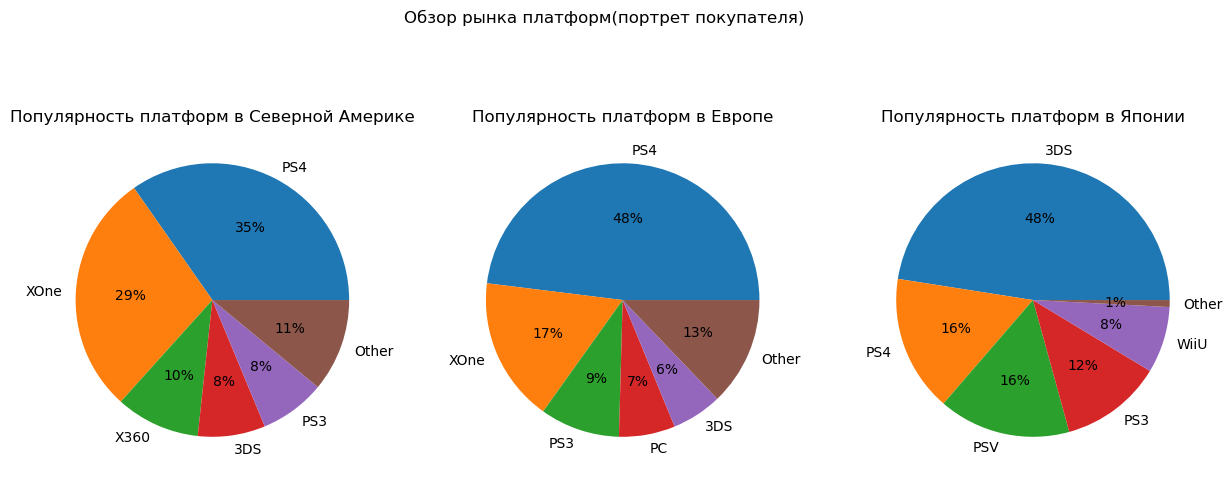

In [66]:
# Cписок регионов
regions = actual_games.columns[4:7]
# круговая диаграмма для каждого региона
fig, ax = plt.subplots(1, 3 , figsize=(15,6))
fig.suptitle('Обзор рынка платформ(портрет покупателя)')
# Построим цикл for x in range
for x in range(3):
  # 5 самых популярных платформ
  df_x = (actual_games.groupby('platform')[regions[x]].sum().
             reset_index().
             sort_values(regions[x], ascending = False, ignore_index = True).
             head(5))
  # Занесем все остальные платформы в категорию other
  df_x = df_x.append({'platform': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
  ax[x].pie(df_x[regions[x]], labels = df_x['platform'], autopct='%1.0f%%')
  # Заполним название для каждой круговой диаграммы
ax[0].set_title('Популярность платформ в Северной Америке')
ax[1].set_title('Популярность платформ в Европе')
ax[2].set_title('Популярность платформ в Японии') 
plt.show()

    В Северной Америке пользователи предпочитают игровую платформу PS4 от Sony. В Европе популярностью пользуется игровая консоль PS4 от Sony. В целом аудитория в Северной Америке и Европе похожа.
    В Японии местные жители отдают предпочтение игровой консоли 3DS от японской компании Nintendo. Можно сказать, что японцы поддерживают отечественного производителя.

### 19 4.2 Определим самые популярные жанры (топ-5). Поясним разницу.

In [67]:
# Определим 5 самых популярных жанров в Северной Америке
actual_games.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


In [68]:
# Определим 5 самых популярных жанров в Европе
actual_games.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


In [69]:
# Определим 5 самых популярных жанров в Японии
actual_games.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False) 

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


C:\Users\user\AppData\Local\Temp\ipykernel_7980\2540541993.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'genre': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
C:\Users\user\AppData\Local\Temp\ipykernel_7980\2540541993.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'genre': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
C:\Users\user\AppData\Local\Temp\ipykernel_7980\2540541993.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_x = df_x.append({'genre': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)


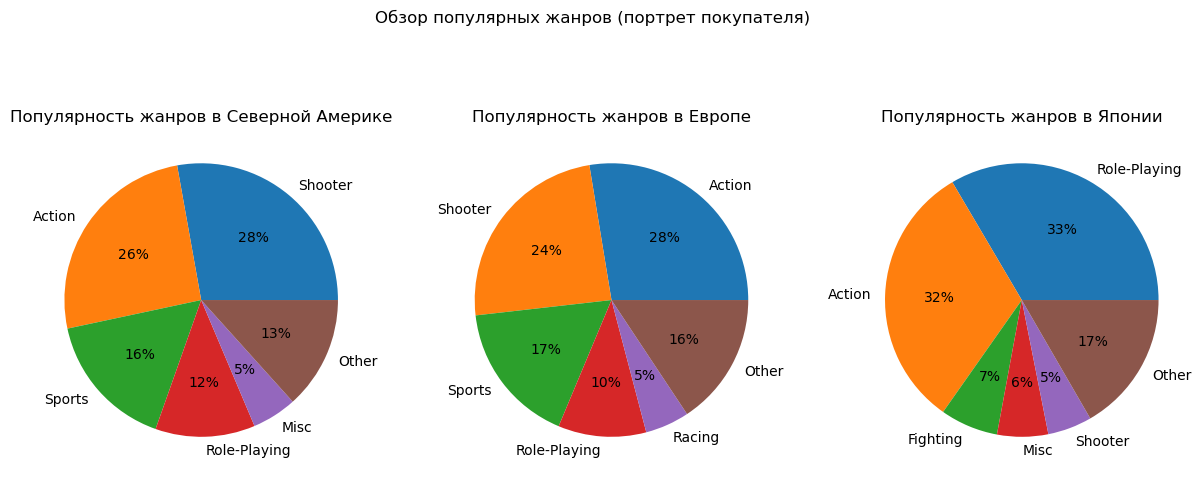

In [70]:
# Cписок регионов
regions = actual_games.columns[4:7]
# круговая диаграмма для каждого региона
fig, ax = plt.subplots(1, 3 , figsize=(15,6))
fig.suptitle('Обзор популярных жанров (портрет покупателя)')
# Построим цикл for x in range
for x in range(3):
  # 5 самых популярных платформ
  df_x = (actual_games.groupby('genre')[regions[x]].sum().
             reset_index().
             sort_values(regions[x], ascending = False, ignore_index = True).
             head(5))
  # Занесем все остальные платформы в категорию other
  df_x = df_x.append({'genre': 'Other', regions[x]: actual_games[regions[x]].sum() - df_x[regions[x]].sum()}, ignore_index= True)
  ax[x].pie(df_x[regions[x]], labels = df_x['genre'], autopct='%1.0f%%')
  # Заполним название для каждой круговой диаграммы
ax[0].set_title('Популярность жанров в Северной Америке')
ax[1].set_title('Популярность жанров в Европе')
ax[2].set_title('Популярность жанров в Японии') 
plt.show()

### 20 4.3  Определим влияние рейтинга ESRB на продажи в отдельном регионе.

In [71]:
# Определим 5 самых популярных рейтингов в Северной Америке
top_5_rating_NA = actual_games.groupby('rating')['na_sales'].agg('sum').sort_values(ascending= False).head()
top_5_rating_NA 

rating
M              96.42
not defined    64.72
E              50.74
T              38.95
E10+           33.23
Name: na_sales, dtype: float64

In [72]:
# Определим 5 самых популярных рейтингов в Европе
top_5_rating_EU = actual_games.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending= False).head()
top_5_rating_EU 

rating
M              93.44
not defined    58.95
E              58.06
T              34.07
E10+           26.16
Name: eu_sales, dtype: float64

In [73]:
# Определим 5 самых популярных рейтингов в Японии
top_5_rating_JP = actual_games.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending= False).head()
top_5_rating_JP 

rating
not defined    56.90
T              14.78
E               8.94
M               8.01
E10+            4.46
Name: jp_sales, dtype: float64

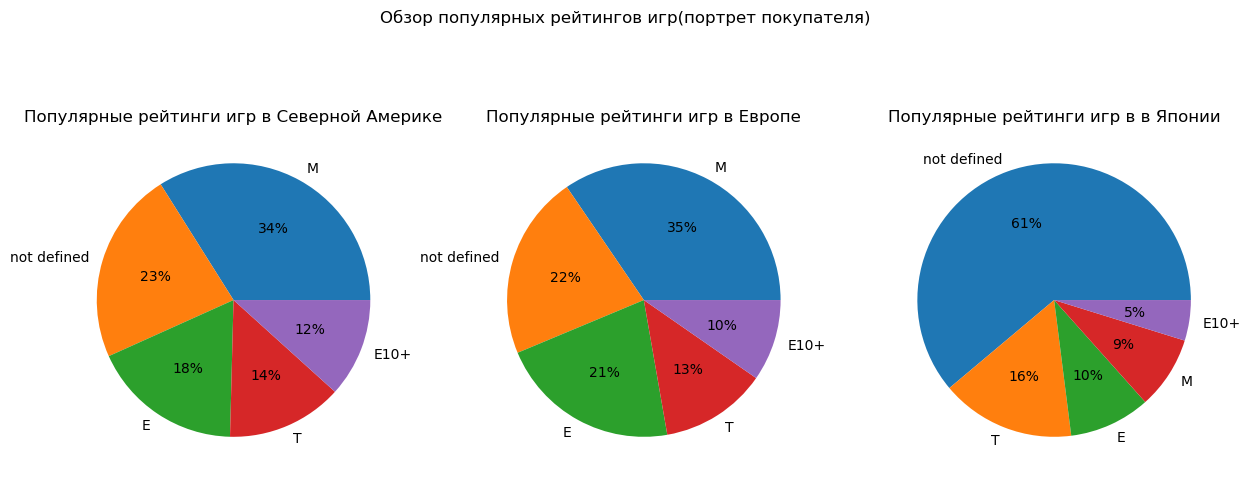

In [74]:
fig, ax= plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Обзор популярных рейтингов игр(портрет покупателя)')
# Построим цикл for x in range
for x in range(3):
  # Определим популярные рейтинги игр
  df_x = (actual_games.groupby('rating')[regions[x]].sum().
             reset_index().
             sort_values(regions[x], ascending = False, ignore_index = True).
             head(5))
  ax[x].pie(df_x[regions[x]], labels = df_x['rating'], autopct='%1.0f%%')
  # Заполним название для каждой круговой диаграммы
ax[0].set_title('Популярные рейтинги игр в Северной Америке')
ax[1].set_title('Популярные рейтинги игр в Европе')
ax[2].set_title('Популярные рейтинги игр в в Японии') 
plt.show()

   В Северной Америке и Европе пользователи предпочитают игры с рейтингом M('для взрослых'). Предполагаю, что пользователями являются игроки старше 18 лет.
  В Японии на первом месте по популярности игры с рейтингом not defined, которым еще не присвоили рейтинг. На втором месте по популярности игры с рейтингом T('для подростков'). 
    
    

    Вывод по составлению  портрета пользователя каждого региона:
   
   1.В Европе и Северной Америке самыми популярными игровыми платформами являются PS4 и XOne от компаний Sony и Microsoft, в то время как аудитория в Японии отдает предпочтение игровой консоли 3DS от компании Nintendo. 
   
   2.Среднестатистические пользователи в Северной Америке и Европе похожи и одинаково отдают предпочтение таким жанрам как Action и Shooter. У пользователей в Японии самым популярным жанром является Action и Role-Playing('ролевые игры'). 
   
   3.Игры с рейтингом M('для взрослых') одинаково популярны для игроков из Северной Америки и Европы. В Японии популярностью пользуются игры с рейтингом not defined.
 

## 21 Шаг 5.  Проверка  гипотез

## 22 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверяя гипотезу, мы сравниваем средние выборки по двум генеральным совокупностям - игры для платформ Xbox One и PC. 

Сформулируем гипотезы.

Нулевая гипотеза -H0: Средние пользовательские рейтинги платформ  Xbox One и PC равны.

Альтернативаня гипотеза - H1: Средние пользовательские рейтинги платформ Xbox One и PC разные 

In [75]:

alpha = 0.05
# укажем уровень статиcтической значимости 
# если p-value окажется меньше него, то отвергнем гипотезу


sample1 = actual_games.query('platform == "XOne"')['user_score']

sample2 =  actual_games.query('platform == "PC"')['user_score']

results = st.ttest_ind(sample1,sample2,alternative = 'two-sided', nan_policy='omit', equal_var = True)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ  Xbox One и PC равны')
else: 
    print('Не получилось отвергнуть нулевую гипотезу:')



p-значение: 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу:


    Вывод: На имеющихся данных на уровне значимости 5% (уровне доверия 95%)  нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги платформ Xbox One и PC равны.


## 23  5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 



    Проверяя гипотезу, мы сравниваем средние выборки по двум генеральным совокупностям - игры для жанров Action и Sports.

Сформулируем гипотезы. 

Нулевая гипотеза-H0. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. 

Альтернативаня гипотеза-H1.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

In [76]:
alpha = 0.05
# укажем уровень статиcтической значимости 
# если p-value окажется меньше него, то отвергнем гипотезу

sample1 = actual_games.query('genre == "Action"')['user_score']
sample2 = actual_games.query('genre == "Sports"')['user_score']

results = st.ttest_ind(sample1,sample2, alternative ='two-sided', nan_policy ='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) /  и Sports (англ. «спортивные соревнования») одинаковые. ')
else: 
    print('Не получилось отвергнуть нулевую гипотезу:')

p-значение: 2.8711147985107304e-19
Отвергаем нулевую гипотезу:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) /  и Sports (англ. «спортивные соревнования») одинаковые. 


Значение pvalue  показывает вероятность получения наблюдаемых результатов при условии, что нулевая гипотеза верна, или вероятность ошибки в случае отклонения нулевой гипотезы.

E - это экспоненциальная запись — представление действительных чисел в виде мантиссы и порядка. Удобна для записи очень больших и очень малых чисел. 2.8711147985107304e-19 - значение очень маленькое

    Вывод: На имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть  основания отвергнуть нулевую гипотезу в пользу альтернативы. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


     Вывод по проверке гипотез: 
    
    Нулевая гипотеза: 'Средние пользовательские рейтинги платформ  Xbox One и PC одинаковые' была принята на уровне значимости 5 % (уровне доверия 95%).
    Нулевая гипотеза: 'Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые' была отвергнута в пользу альтернативы. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 ## 24 Общий вывод 

Сборный проект завершен . В ходе исследования были выполнены следующие шаги: 
    
1) В первом шаге исследования был выгружен датафрейм, изучена общая информация о нем, проведено первичное знакомство с данными
2) Во втором шаге исследования была проведена подготовка данных, нужные столбцы были приведены к нижнему регистру, для нужных столбцов были заменены типы данных. Была проведена работа по заполнению пропущенных значений  в столбцах таблицы. Также был добавлен столбец total_sales, в котором содержится информация о суммарных продажах.
3) В третьем шаге исследования был проведен исследовательский анализ данных. Проведя анализ, выяснили что средний жизненный цикл платформы от создания продукта до ухода с рынка составил 10 лет. В ходе анализа были определены самые прибыльные игровые консоли. Ими оказались XOne,PS4,3DS,PC. Построили матрицу диаграмм рассеяния для платформ и определили тесноту взаимосвязи между суммарными продажами и отзывами критиков и пользователей. Оказалось, что суммарные продажи больше всего взаимосвязаны с отзывами критиков. 
4) В четвертом шаге исследования составили портрет пользователя для каждого региона.
  * В Северной Америке  пользователи выбирают игровые консоли PS4. Игроки отдают предпочтение таким жанрам как экшн, шутеры  и спортивные игры. Игроки выбирают игры с рейтингом M ("для взрослых").
  * В Европе пользователи выбирают игровые платформы PS4.Жанровые предпочтения такие же как и в Северной Америке. Это экшн и шутеры. В Европе игроки выбирают игры с рейтингом M.
  * В Японии местные игроки предпочитают игровую консоль 3DS от японской компании Nintendo. Среди любимого жанра у них на первом месте Role-Playing(ролевые игры), на втором месте Action. Японцы выбирают часто игры с рейтингом not defined. 
5) В пятом шаге исследования были проверены две гипотезы. 
   Нулевая гипотеза: 'Средние пользовательские рейтинги платформ  Xbox One и PC одинаковые' не была отвергнута.
   Нулевая гипотеза: 'Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые' была отвергнута в пользу альтернативы.
    
   Результаты проведенного исследования  могут быть полезны для заказчика - интернет-магазина «Стримчик, занимающегося продажей компьютерных игр. Можно дать определенные рекомендации для заказчика:
   1) сделать упор на продажу игр для игровых платформ нового поколения (XOne, PS4,3DS)
   2) отдавать предпочтение жанрам 'Action' и 'Shooter' и с рейтингом M. В таком случае можно прогнозировать, что продажи повысятся.
